In [1]:
!git clone https://github.com/Karan-Malik/Chatbot/

Cloning into 'Chatbot'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163 (delta 33), reused 30 (delta 30), pack-reused 127 (from 1)
Receiving objects: 100% (163/163), 2.98 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import json
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
# Load the intents file
with open('/content/Chatbot/chatbot_codes/intents.json') as data_file:
    intents = json.load(data_file)

In [4]:
# Pre-processing
words = []
classes = []
documents = []
ignore = ['?']

# Loop through each sentence in the intents' patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each and every word in the sentence
        w = nltk.word_tokenize(pattern)
        # Add words to the words list
        words.extend(w)
        # Add word(s) to documents
        documents.append((w, intent['tag']))
        # Add tags to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [5]:
# Perform stemming and lower each word as well as remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))

# Remove duplicate classes
classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique stemmed words", words)

113 documents
30 classes ['Identity', 'activity', 'age', 'appreciate', 'contact', 'covid19', 'cricket', 'datetime', 'exclaim', 'goodbye', 'google', 'greeting', 'greetreply', 'haha', 'inspire', 'insult', 'jokes', 'karan', 'news', 'nicetty', 'no', 'options', 'programmer', 'riddle', 'song', 'suggest', 'thanks', 'timer', 'weather', 'whatsup']
119 unique stemmed words ["'m", "'s", ',', '10', '19', 'a', 'ag', 'am', 'anyon', 'ar', 'ask', 'awesom', 'bad', 'bby', 'be', 'best', 'bye', 'can', 'contact', 'could', 'covid', 'cre', 'cricket', 'cur', 'dat', 'day', 'design', 'develop', 'do', 'doing', 'dumb', 'fin', 'for', 'funny', 'get', 'good', 'goodby', 'googl', 'gre', 'hah', 'he', 'hello', 'help', 'hey', 'hi', 'hol', 'hot', 'how', 'i', 'idiot', 'ind', 'inspir', 'internet', 'is', 'it', 'jok', 'kar', 'know', 'lat', 'latest', 'laugh', 'lmao', 'lol', 'lost', 'mad', 'mak', 'malik', 'match', 'me', 'mot', 'namast', 'new', 'next', 'nic', 'no', 'nop', 'off', 'ok', 'old', 'program', 'provid', 'quest', 'riddl'

In [6]:
# Create training data
training = []
output = []

# Create an empty array for output
output_empty = [0] * len(classes)

# Create training set, bag of words for each sentence
for doc in documents:
    # Initialize bag of words
    bag = []
    # List of tokenized words for the pattern
    pattern_words = doc[0]
    # Stemming each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # Create bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # Output is '1' for current tag and '0' for rest of other tags
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# Shuffling features and turning it into np.array
random.shuffle(training)
training = np.array(training, dtype=object)

# Creating training lists
train_x = list(training[:, 0])
train_y = list(training[:, 1])


In [7]:
# Reset the default TensorFlow graph
tf.compat.v1.reset_default_graph()

# Define the model
model = keras.Sequential([
    layers.InputLayer(input_shape=(len(train_x[0]),), name='input_layer'),
    layers.Dense(10, activation='relu', name='hidden_layer1'),
    layers.Dense(10, activation='relu', name='hidden_layer2'),
    layers.Dense(len(train_y[0]), activation='softmax', name='output_layer')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs')

# jika terjadi error, jalankan kode berikut
train_x = np.array(train_x)
train_y = np.array(train_y)

# Train the model
model.fit(train_x, train_y, epochs=1000, batch_size=8, callbacks=[tensorboard_callback], verbose=1)

# Save the model
model.save('model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0151 - loss: 3.4084
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0261 - loss: 3.3992
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0259 - loss: 3.3965
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0843 - loss: 3.3804 
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0741 - loss: 3.3666 
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0883 - loss: 3.3590 
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0692 - loss: 3.3565 
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1048 - loss: 3.3327
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0921 - loss: 3.3409
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1041 - loss: 3.3115
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0982 - loss: 3.3087
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 

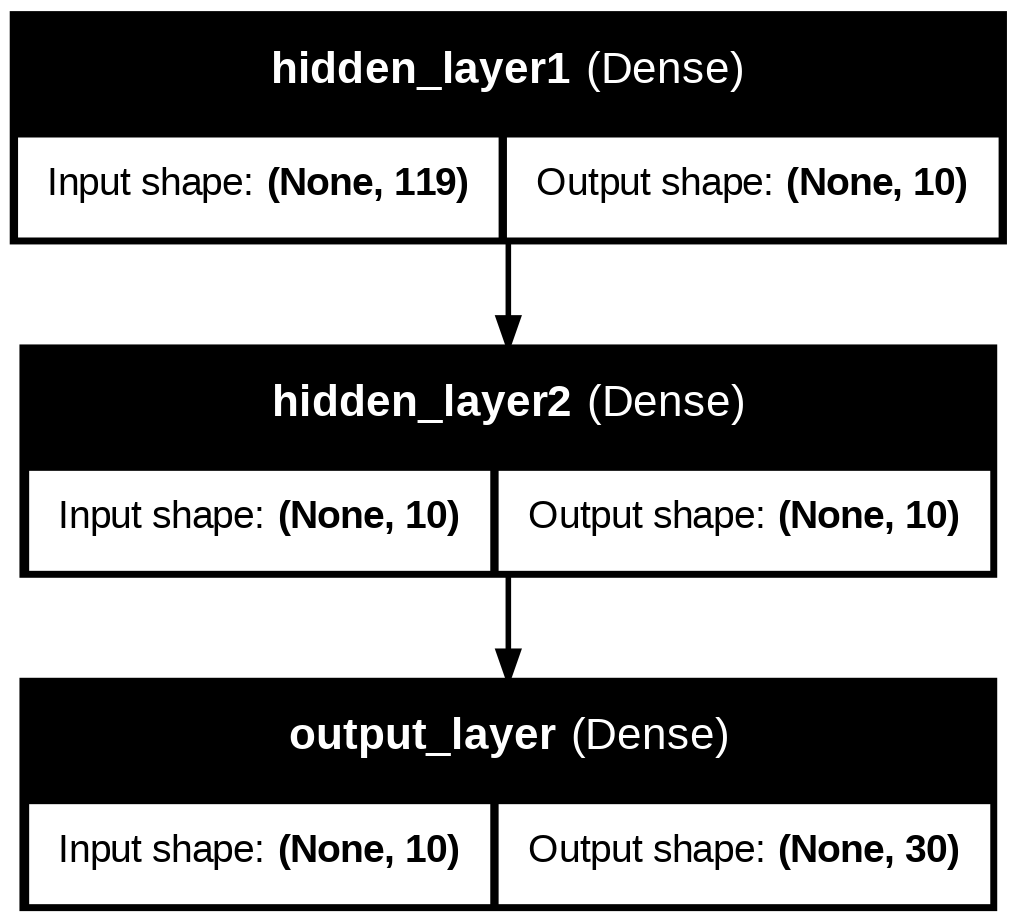

In [8]:
# model graph plot
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [12]:
# tensorflow version display
print(tf.__version__)

2.18.0


In [9]:
# Save the data using pickle
with open("training_data", "wb") as file:
    pickle.dump({'words': words, 'classes': classes, 'train_x': train_x, 'train_y': train_y}, file)

# Load the data using pickle
with open("training_data", "rb") as file:
    data = pickle.load(file)

words = data['words']
classes = data['classes']
train_x = np.array(data['train_x'])
train_y = np.array(data['train_y'])

# Load the trained model
model = keras.models.load_model('model.h5')

In [10]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=False):
    bag = [0] * len(words)
    sentence_words = clean_up_sentence(sentence)
    for s in sentence_words:
        for i, w in enumerate(words):
            if s == w:
                bag[i] = 1
                if show_details:
                    print("Found in bag: %s" % w)
    return np.array(bag)

ERROR_THRESHOLD = 0.30

def classify(sentence):
    results = model.predict(np.array([bow(sentence, words)]))[0]
    results = [[i, r] for i, r in enumerate(results) if r >= ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    if results:
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    return print(random.choice(i['responses']))
            results.pop(0)
    else:
        return print("Maaf, saya tidak mengerti apa yang Anda katakan.")

In [11]:
asvavdsvdsavdsav

NameError: name 'asvavdsvdsavdsav' is not defined

In [ ]:
print("0 to close")
while True:
    message = input("You : ")
    if message == "0":
        break
    result = response(message)
    print(result)